In [1]:
from PIL import Image
import os

In [5]:
train_root = "../../data/asl/train"
img = Image.open(os.path.join(train_root, "A/A1.jpg"))
img.show()
print(img.size)

(200, 200)


In [6]:
small_img = img.resize((50, 50))
# small_img.show()
#img.thumbnail((60,50))
(small_img.size, img.size)

((50, 50), (200, 200))

In [7]:
from PIL import ImageFilter

img_filter1 = img.filter(ImageFilter.GaussianBlur(2))

In [8]:
train_root = 'data/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
test_root = 'data/asl-alphabet/asl_alphabet_test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
label_map = {}
for id, cl in enumerate(classes):
    label_map[cl] = id

In [9]:
import os
import torch
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [10]:
class AslDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Arguments
        ---------
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.img_path_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_path_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir, self.img_path_frame.iloc[idx, 0])
        image = Image.open(img_name)
        label = self.img_path_frame.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)

        return image, label

In [11]:
asl_train = AslDataset(
    csv_file="asl_alphabet_train.csv",
    root_dir="../../data/asl/train",
    transform=transforms.ToTensor())
asl_dataloader = DataLoader(asl_train, batch_size=4, shuffle=True)
len(asl_train)

87000

0 torch.Size([4, 3, 200, 200]) torch.Size([4])
1 torch.Size([4, 3, 200, 200]) torch.Size([4])
2 torch.Size([4, 3, 200, 200]) torch.Size([4])
3 torch.Size([4, 3, 200, 200]) torch.Size([4])


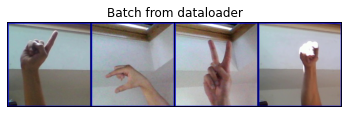

In [12]:
import matplotlib.pyplot as plt

def show_batch(imgs_batched):
    """Show image for a batch of samples."""

    grid = utils.make_grid(imgs_batched)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title('Batch from dataloader')

i_batch = 0
for img, label in asl_dataloader:
    print(i_batch, img.size(), label.size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_batch(img)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break
    i_batch += 1